# Clustering Analysis

In [1]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading libraries for machine learning - clustering analysis
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# loading the file
hotel_df = pd.read_csv("/Users/georgekalfas/Downloads/ML-HotelReservations/EDA-ML/Hotel Reservations.csv")

In [3]:
# creating a copy of the hotel_df
hotel_df_copy = hotel_df.copy()

In [4]:
# dropping booking_id column
hotel_df_copy.drop('Booking_ID', axis=1, inplace=True)

In [5]:
# selecting relevant columns for clustering
selected_columns = ['no_of_adults', 'no_of_children', 'type_of_meal_plan', 'room_type_reserved', 'avg_price_per_room', 'no_of_special_requests']

In [6]:
# creating a new df with only the selected columns
selected_df = hotel_df_copy[selected_columns].copy()

In [7]:
# handling categorical variables using one-hot encoding
selected_df = pd.get_dummies(selected_df, columns=['type_of_meal_plan', 'room_type_reserved'])

In [8]:
# handling missing values if any
selected_df.fillna(0, inplace=True)  # filling missing values with 0, you might choose a different strategy

In [9]:
# scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_df)

# Finding the optimal number of clusters for the dataset

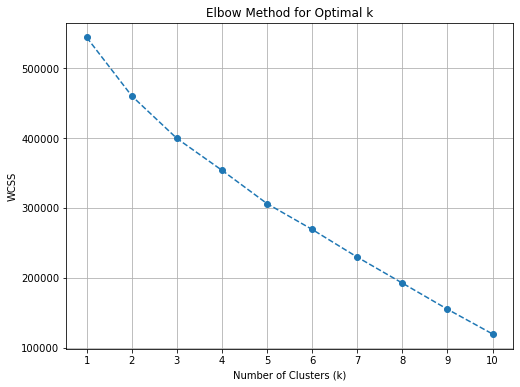

In [10]:
wcss = []  # Within-cluster sum of squares

# Test different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)  # inertia: within-cluster sum of squares

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Before deciding to choose the optimal number of clusters from the `Elbow Method`, we will use the `Silhouette Score` for having a better understanding of our dataset.

### The `Silhouette Score` after the `Elbow Method` will:

- **Post-Elbow Method**: After determining a range of potential cluster numbers using the Elbow Method, the Silhouette Score helps refine the choice of the optimal number of clusters.
- **Refinement Tool**: Offers an alternative or supplementary approach to select the best number of clusters by providing a quantitative metric.
- **Selection Criteria**: Helps in confirming or re-evaluating the optimal number of clusters suggested by the Elbow Method.
- **Final Decision**: The optimal number of clusters might be confirmed as the value that yields the highest silhouette score or the value closest to 1.

In [11]:
silhouette_scores = []

for i in range(2, 11):  # Test different values of k from 2 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {i}, the average silhouette_score is: {silhouette_avg}")

# Find the optimal number of clusters based on the silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # adding 2 to start from k=2
print(f"\nOptimal number of clusters based on silhouette score: {optimal_num_clusters}")

For n_clusters = 2, the average silhouette_score is: 0.40257536345593514
For n_clusters = 3, the average silhouette_score is: 0.36185232922610294
For n_clusters = 4, the average silhouette_score is: 0.39211746814094806
For n_clusters = 5, the average silhouette_score is: 0.4666152956076441
For n_clusters = 6, the average silhouette_score is: 0.4840708256104235
For n_clusters = 7, the average silhouette_score is: 0.49539396832124827
For n_clusters = 8, the average silhouette_score is: 0.5141630757724434
For n_clusters = 9, the average silhouette_score is: 0.5278700227122285
For n_clusters = 10, the average silhouette_score is: 0.5286572908521044

Optimal number of clusters based on silhouette score: 10


### Analysis Conclusion for choosing the optimal number of clusters.

After conducting clustering analysis using both the `Elbow Method` and `Silhouette Scores`, it is apparent that the proposition of having 10 clusters might not be the most suitable choice (indicated by `Silhouette Scores`). Instead, opting for 5 clusters is a more pragmatic decision, considering several key factors:

#### Complexity and Interpretability
- A higher number of clusters (10) can lead to increased complexity in interpreting and categorizing data points. This complexity might hinder the derivation of actionable insights or practical applications due to excessive granularity.
- There's a risk of having less distinct or overlapping clusters, making it challenging to interpret or differentiate between them effectively.

#### Practicality and Usability
- Utilizing 5 clusters strikes a balance between granularity and simplicity, enabling more straightforward interpretation and implementation in various real-world applications or decision-making processes.

#### Computational Efficiency
- Fewer clusters (5) reduce computational complexity, making the model more efficient, especially in scenarios involving real-time processing or resource constraints.

#### Robustness and Generalizability
- Opting for a smaller number of clusters can lead to models that generalize better to new or unseen data, ensuring robustness and preventing overfitting.

### Conclusion
- Taking into account the aforementioned considerations and the significant silhouette score obtained for 5 clusters (0.4666), indicating well-defined clusters with a lower number, it is recommended to choose n_clusters = 5 as the optimal number.
- This choice ensures a balance between interpretability, practicality, and computational efficiency, fostering clearer insights and feasible applications of the clustering analysis.

In [12]:
# applying K-means clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [13]:
# adding the cluster labels to the DataFrame
selected_df['Cluster_Labels'] = kmeans.labels_

In [14]:
# analyzing the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # inversing transform the centers to interpret them in the original scale
cluster_centers_df = pd.DataFrame(cluster_centers, columns=selected_df.columns[:-1])  # excluding the 'Cluster_Labels' column

In [15]:
# viewing the cluster centers (representative values for each cluster)
# print(cluster_centers_df)

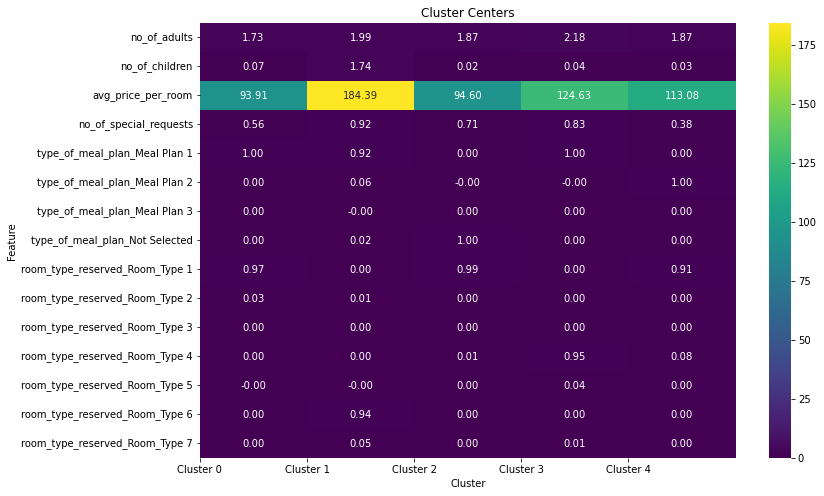

In [16]:
# plotting a heatmap for cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centers_df.T, annot=True, fmt='.2f', cmap='viridis')
plt.title('Cluster Centers')
plt.xlabel('Cluster')
plt.ylabel('Feature')
plt.xticks(ticks=range(num_clusters), labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

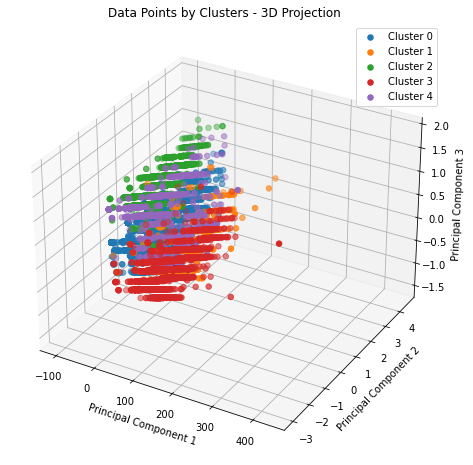

In [17]:
# reducing dimensionality for visualization using PCA with 3 components
pca = PCA(n_components=5)
reduced_data_3d = pca.fit_transform(selected_df.drop('Cluster_Labels', axis=1))  # Drop the cluster labels column

# Create a 3D scatter plot with data points colored by clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_clusters):
    cluster_data = reduced_data_3d[selected_df['Cluster_Labels'] == i]
    ax.scatter(
        cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2],
        label=f'Cluster {i}', s=30
    )

ax.set_title('Data Points by Clusters - 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

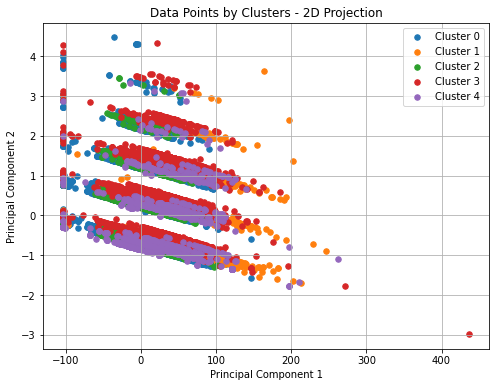

In [18]:
# Reduce dimensionality for visualization using PCA with 2 components
pca = PCA(n_components=5)
reduced_data_2d = pca.fit_transform(selected_df.drop('Cluster_Labels', axis=1))  # Drop the cluster labels column

# Create a 2D scatter plot with data points colored by clusters
plt.figure(figsize=(8, 6))

for i in range(num_clusters):
    cluster_data = reduced_data_2d[selected_df['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data[:, 0], cluster_data[:, 1],
        label=f'Cluster {i}', s=30
    )

plt.title('Data Points by Clusters - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Cancellation Cluster Analysis

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/325367658.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/325367658.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellation_data['Cluster_Labels'] = kmeans.labels_


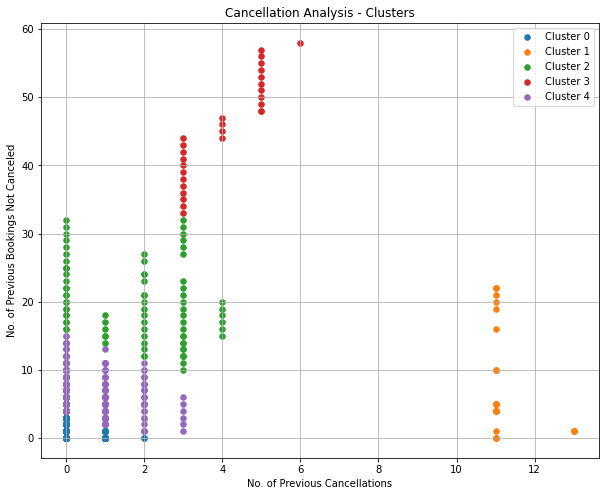

In [19]:
# Selecting relevant columns for cancellation analysis
cancellation_cols = ['no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled']

# Creating a DataFrame with selected columns
cancellation_data = hotel_df_copy[cancellation_cols]

# Handling missing values (if any)
cancellation_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancellation_data)

# Applying K-means clustering
num_clusters = 5  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
cancellation_data['Cluster_Labels'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_data = cancellation_data[cancellation_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['no_of_previous_cancellations'], cluster_data['no_of_previous_bookings_not_canceled'],
        label=f'Cluster {i}', s=30
    )

plt.title('Cancellation Analysis - Clusters')
plt.xlabel('No. of Previous Cancellations')
plt.ylabel('No. of Previous Bookings Not Canceled')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/3171729747.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/3171729747.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data['Cluster_Labels'] = kmeans.labels_


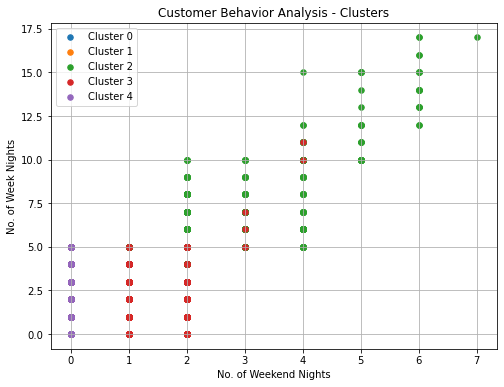

In [20]:
# Selecting columns for customer behavior analysis
behavior_cols = ['no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space',
                 'no_of_special_requests', 'avg_price_per_room']

# Creating a DataFrame with selected columns
behavior_data = hotel_df_copy[behavior_cols]

# Handling missing values (if any)
behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(behavior_data)

# Applying K-means clustering
num_clusters = 5  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
behavior_data['Cluster_Labels'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = behavior_data[behavior_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['no_of_weekend_nights'], cluster_data['no_of_week_nights'],
        label=f'Cluster {i}', s=30
    )

plt.title('Customer Behavior Analysis - Clusters')
plt.xlabel('No. of Weekend Nights')
plt.ylabel('No. of Week Nights')
plt.legend()
plt.grid(True)
plt.show()

/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/3690467993.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy
/var/folders/gq/bllqt9gj1bq5wzshmf8x9wcw0000gn/T/ipykernel_16638/3690467993.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behavior_data['Cluster_Labels'] = kmeans.labels_


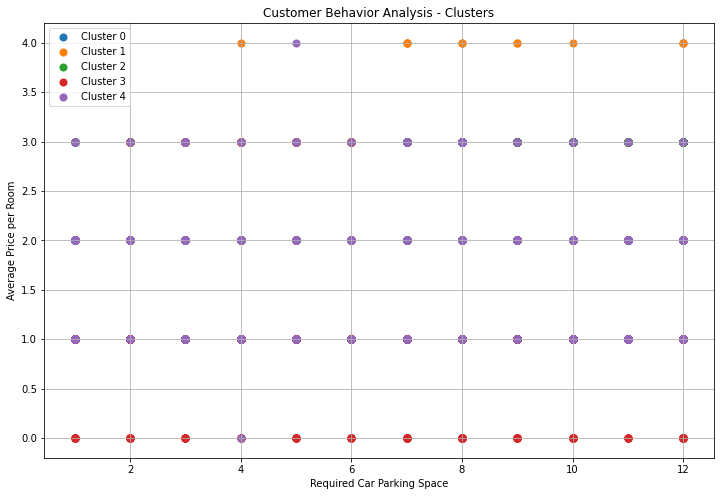

Cluster Means for Each Feature:
                required_car_parking_space  avg_price_per_room  \
Cluster_Labels                                                   
0                                      0.0           97.498820   
1                                      0.0          133.472113   
2                                      0.0           96.748565   
3                                      0.0           89.306490   
4                                      1.0          115.453016   

                no_of_special_requests  arrival_month  no_of_adults  
Cluster_Labels                                                       
0                             0.440069       4.107887      2.046068  
1                             1.662474       8.550239      2.129050  
2                             0.259803       9.623011      2.053170  
3                             0.298497       7.158060      0.981421  
4                             1.006228       7.157473      1.878114  


In [21]:
# Selecting columns for customer behavior analysis
behavior_cols = ['required_car_parking_space', 'avg_price_per_room', 'no_of_special_requests','arrival_month', 'no_of_adults']

# Adding more relevant columns as needed
# behavior_cols.extend(['other_column1', 'other_column2', ...])

# Creating a DataFrame with selected columns
behavior_data = hotel_df_copy[behavior_cols]

# Handling missing values (if any)
behavior_data.fillna(0, inplace=True)  # Filling missing values with 0, you might choose a different strategy

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(behavior_data)

# Applying K-means clustering
num_clusters = 5  # You can change this value based on your requirement
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_data)

# Adding cluster labels to the DataFrame
behavior_data['Cluster_Labels'] = kmeans.labels_

# Analyzing cluster characteristics
cluster_means = behavior_data.groupby('Cluster_Labels').mean()

# Visualizing the clusters with different columns
plt.figure(figsize=(12, 8))
for i in range(num_clusters):
    cluster_data = behavior_data[behavior_data['Cluster_Labels'] == i]
    plt.scatter(
        cluster_data['arrival_month'], cluster_data['no_of_adults'],
        label=f'Cluster {i}', s=50
    )

plt.title('Customer Behavior Analysis - Clusters')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Average Price per Room')
plt.legend()
plt.grid(True)
plt.show()

# Displaying cluster means for each feature
print("Cluster Means for Each Feature:")
print(cluster_means)